In [1]:
# https://archive.ics.uci.edu/ml/datasets/student+performance

# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
# 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# 2 sex - student's sex (binary: 'F' - female or 'M' - male)
# 3 age - student's age (numeric: from 15 to 22)
# 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
# 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
# 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# 16 schoolsup - extra educational support (binary: yes or no)
# 17 famsup - family educational support (binary: yes or no)
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# 19 activities - extra-curricular activities (binary: yes or no)
# 20 nursery - attended nursery school (binary: yes or no)
# 21 higher - wants to take higher education (binary: yes or no)
# 22 internet - Internet access at home (binary: yes or no)
# 23 romantic - with a romantic relationship (binary: yes or no)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
# 30 absences - number of school absences (numeric: from 0 to 93)

# # these grades are related with the course subject, Math or Portuguese:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
# import tools
    
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from pathlib import Path  

C:\Users\mitch\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# import two dataframes
df_por = pd.read_csv(r'C:\Users\mitch\OneDrive\Documents\Metis Business\student\student-por.csv')
df_por.columns = df_por.columns.str.strip()

df_mat = pd.read_csv(r'C:\Users\mitch\OneDrive\Documents\Metis Business\student\student-mat.csv')
df_mat.columns = df_mat.columns.str.strip()

In [4]:
# combine into new df
df = pd.concat([df_por, df_mat]).reset_index()
df.drop(axis = 1, columns = ['index'], inplace = True)
# df
# df.info()
# df.describe()

In [5]:
# rename columns and create new feature Average Grades
df.rename(columns={"address": "Environment", "Pstatus": "Parents_Relationship", "Medu": "M_Education", "Fedu": "F_Education", 
                   "Mjob": "M_Job", "Fjob": "F_Job", "schoolsup": "School_Support", "famsup": "Family_Support", 
                   "paid": "Extra_Classes", "higher": "Higher_Ed", "famrel": "Family_Relationship", "goout": "Extroverted", 
                   "Dalc": "Alc_Weekday", "Walc": "Alc_Weekend", "G1": "Grades_1", "G2": "Grades_2", "G3": "Grades_3"}, 
          inplace=True)

df['Grades_AVG'] = df[['Grades_1', 'Grades_2', 'Grades_3']].mean(axis=1)

In [6]:
# define functions to prep categorical features for dummy variables
def m_education_level(x):
    if x == 0:
        return 'm_no_education'
    elif x == 1:
        return 'm_4th_grade'
    elif x == 2:
        return 'm_9th_grade'
    elif x == 3:
        return 'm_12th_grade'
    else:
        return 'm_college'
def f_education_level(x):
    if x == 0:
        return 'f_no_education'
    elif x == 1:
        return 'f_4th_grade'
    elif x == 2:
        return 'f_9th_grade'
    elif x == 3:
        return 'f_12th_grade'
    else:
        return 'f_college'
def m_job_string(x):
    return 'm_' + x
def f_job_string(x):
    return 'f_' + x
def attendance_reason(x):
    return 'reason_' + x
def guardian_person(x):
    return 'guardian_' + x
def s_sup(x):
    if x == 'yes':
        return 's_supported'
    else:
        return 's_unsupported'
def f_sup(x):
    if x == 'yes':
        return 'f_supported'
    else:
        return 'f_unsupported'
def extra_classes(x):
    if x == 'yes':
        return 'extra_class'
    else:
        return 'no_extra_class'
def extra_curricular(x):
    if x == 'yes':
        return 'activities'
    else:
        return 'no_activities'
def nursery_school(x):
    if x == 'yes':
        return 'went_to_nursery'
    else:
        return 'no_nursery'
def higher_ed(x):
    if x == 'yes':
        return 'continued_ed'
    else:
        return 'no_further_ed'
def internet_access(x):
    if x == 'yes':
        return 'internet'
    else:
        return 'no_internet'
def romanticly_involved(x):
    if x == 'yes':
        return 'romance'
    else:
        return 'no_romance'
def gender(x):
    if x == 'M':
        return 'Male'
    else:
        return 'Female'
def environment(x):
    if x == 'U':
        return 'Urban'
    else:
        return 'Rural'
def family_size(x):
    if x == 'LE3':
        return 'fam_<=3'
    else:
        return 'fam_>3'
def pstatus(x):
    if x == 'T':
        return 'p_together'
    else:
        return 'p_seperated'

In [7]:
# apply the dummy prep functions to the categorical features
df['M_Education'] = df['M_Education'].apply(lambda x: m_education_level(x))
df['F_Education'] = df['F_Education'].apply(lambda x: f_education_level(x))
df['M_Job'] = df['M_Job'].apply(lambda x: m_job_string(x))
df['F_Job'] = df['F_Job'].apply(lambda x: f_job_string(x))
df['reason'] = df['reason'].apply(lambda x: attendance_reason(x))
df['guardian'] = df['guardian'].apply(lambda x: guardian_person(x))
df['School_Support'] = df['School_Support'].apply(lambda x: s_sup(x))
df['Family_Support'] = df['Family_Support'].apply(lambda x: f_sup(x))
df['Extra_Classes'] = df['Extra_Classes'].apply(lambda x: extra_classes(x))
df['activities'] = df['activities'].apply(lambda x: extra_curricular(x))
df['nursery'] = df['nursery'].apply(lambda x: nursery_school(x))
df['Higher_Ed'] = df['Higher_Ed'].apply(lambda x: higher_ed(x))
df['internet'] = df['internet'].apply(lambda x: internet_access(x))
df['romantic'] = df['romantic'].apply(lambda x: romanticly_involved(x))
df['sex'] = df['sex'].apply(lambda x: gender(x))
df['Environment'] = df['Environment'].apply(lambda x: environment(x))
df['famsize'] = df['famsize'].apply(lambda x: family_size(x))
df['Parents_Relationship'] = df['Parents_Relationship'].apply(lambda x: pstatus(x))

In [8]:
# save df as CSV
filepath = Path('C:\\Users\\mitch\\OneDrive\\Documents\\Metis Business\\out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [9]:
# dummy variables are created and set to dataframes
sex = pd.get_dummies(df['sex'],drop_first=True)
Environment = pd.get_dummies(df['Environment'],drop_first=True)
famsize = pd.get_dummies(df['famsize'],drop_first=True)
Parents_Relationship = pd.get_dummies(df['Parents_Relationship'],drop_first=True)
M_Education = pd.get_dummies(df['M_Education'],drop_first=True)
F_Education = pd.get_dummies(df['F_Education'],drop_first=True)
M_Job = pd.get_dummies(df['M_Job'],drop_first=True)
F_Job = pd.get_dummies(df['F_Job'],drop_first=True)
reason = pd.get_dummies(df['reason'],drop_first=True)
guardian = pd.get_dummies(df['guardian'],drop_first=True)
School_Support = pd.get_dummies(df['School_Support'],drop_first=True)
Family_Support = pd.get_dummies(df['Family_Support'],drop_first=True)
Extra_Classes = pd.get_dummies(df['Extra_Classes'],drop_first=True)
activities = pd.get_dummies(df['activities'],drop_first=True)
nursery = pd.get_dummies(df['nursery'],drop_first=True)
Higher_Ed = pd.get_dummies(df['Higher_Ed'],drop_first=True)
internet = pd.get_dummies(df['internet'],drop_first=True)
romantic = pd.get_dummies(df['romantic'],drop_first=True)

In [10]:
# Create 3 dataframes for correlation prep
categorical_list_Family = [famsize, Parents_Relationship, M_Education, F_Education, M_Job, F_Job, guardian, Family_Support]
categorical_list_Personal = [sex, Environment, reason, School_Support, Extra_Classes, activities, nursery, Higher_Ed, internet, 
                             romantic]

categorical_df_fam = df['Grades_AVG'].to_frame()
categorical_df_per = df['Grades_AVG'].to_frame()

categorical_df_fam = categorical_df_fam.join(categorical_list_Family)
categorical_df_per = categorical_df_per.join(categorical_list_Personal)

numerical_df = df[['Grades_AVG', 'age', 'traveltime', 'studytime', 'failures', 'Family_Relationship', 'freetime', 'Extroverted',
                  'Alc_Weekday', 'Alc_Weekend', 'health', 'absences']]

In [11]:
# Get correlation/heatmaps from: categorical_df_fam, categorical_df_per, numerical_df
categorical_df_fam.corr()

# rcParams['figure.figsize'] = 50,30
# heatmap = sns.heatmap(categorical_df_per.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
# plt.savefig('heatmap')

,Grades_AVG,fam_>3,p_together,m_4th_grade,m_9th_grade,m_college,m_no_education,f_4th_grade,f_9th_grade,f_college,...,m_other,m_services,m_teacher,f_health,f_other,f_services,f_teacher,guardian_mother,guardian_other,f_unsupported
Grades_AVG,1.000000,-0.061847,-0.015809,-0.166799,-0.057602,0.221440,0.011577,-0.170528,-0.006169,0.148291,...,-0.074318,0.049459,0.099422,0.041961,-0.041220,-0.024344,0.127687,0.000291,-0.093602,0.000429
fam_>3,-0.061847,1.000000,0.207302,-0.052168,0.008028,-0.010681,0.014521,-0.038962,-0.045642,0.018737,...,0.060404,-0.029792,-0.050327,-0.021480,-0.016224,0.002748,0.078831,-0.021165,0.019775,-0.067340
p_together,-0.015809,0.207302,1.000000,0.078869,0.030063,-0.003514,0.033763,0.046396,-0.009367,-0.065881,...,-0.029286,-0.044868,0.027796,-0.019227,-0.050112,0.092286,-0.030545,-0.069200,-0.088464,-0.013370
m_4th_grade,-0.166799,-0.052168,0.078869,1.000000,-0.303037,-0.315393,-0.045674,0.447894,-0.061268,-0.238278,...,0.093807,-0.203399,-0.184722,-0.086545,0.019555,0.024320,-0.096102,-0.083698,0.093898,0.088772
m_9th_grade,-0.057602,0.008028,0.030063,-0.303037,1.000000,-0.398390,-0.057693,0.045453,0.288336,-0.245141,...,0.138994,0.060330,-0.233332,-0.036917,0.083385,0.010343,-0.141699,0.020853,-0.035324,0.062260
m_college,0.221440,-0.010681,-0.003514,-0.315393,-0.398390,1.000000,-0.060046,-0.322998,-0.222722,0.509244,...,-0.263941,-0.065371,0.547448,0.118982,-0.157560,-0.030878,0.321779,0.085290,-0.094040,-0.118440
m_no_education,0.011577,0.014521,0.033763,-0.045674,-0.057693,-0.060046,1.000000,0.019101,0.049426,-0.048738,...,0.011948,-0.050810,-0.035168,-0.018854,0.020150,-0.058108,-0.024028,-0.051327,0.055690,0.032276
f_4th_grade,-0.170528,-0.038962,0.046396,0.447894,0.045453,-0.322998,0.019101,1.000000,-0.382352,-0.297902,...,0.106122,-0.077399,-0.201472,-0.103776,0.120176,-0.042667,-0.128437,0.021743,0.079446,0.100270
f_9th_grade,-0.006169,-0.045642,-0.009367,-0.061268,0.288336,-0.222722,0.049426,-0.382352,1.000000,-0.350609,...,0.081691,0.023790,-0.121306,-0.071673,0.078231,0.010975,-0.172851,0.036364,-0.029676,0.040897
f_college,0.148291,0.018737,-0.065881,-0.238278,-0.245141,0.509244,-0.048738,-0.297902,-0.350609,1.000000,...,-0.199799,0.042875,0.283431,0.230674,-0.236415,-0.050171,0.454375,-0.011169,-0.051812,-0.132613


In [12]:
# make dataframe from correlates and drop all but the Grades_AVG column
cat_df_fam = categorical_df_fam.corr()
cat_df_per = categorical_df_per.corr()
num_df = numerical_df.corr()

drop_fam = cat_df_fam[['fam_>3', 'p_together', 'm_4th_grade', 'm_9th_grade', 'm_college', 'm_no_education', 'f_4th_grade', 
                       'f_9th_grade', 'f_college', 'f_no_education', 'm_health', 'm_other', 'm_services', 'm_teacher', 
                       'f_health', 'f_other', 'f_services', 'f_teacher', 'guardian_mother', 'guardian_other', 'f_unsupported']]
drop_per = cat_df_per[['Male', 'Urban', 'reason_home', 'reason_other', 'reason_reputation', 's_unsupported', 'no_extra_class', 
                       'no_activities', 'went_to_nursery', 'no_further_ed', 'no_internet', 'romance']]

drop_num = num_df[['age', 'traveltime', 'studytime', 'failures', 'Family_Relationship', 'freetime', 'Extroverted', 
                       'Alc_Weekday', 'Alc_Weekend', 'health', 'absences']]

cat_df_fam.drop(axis=1, columns = drop_fam, inplace = True)
cat_df_per.drop(axis=1, columns = drop_per, inplace = True)
num_df.drop(axis=1, columns = drop_num, inplace = True)

cat_df_fam.sort_values(by = 'Grades_AVG', inplace = True)
cat_df_per.sort_values(by = 'Grades_AVG', inplace = True)
num_df.sort_values(by = 'Grades_AVG', inplace = True)

# num_df
# cat_df_per
# cat_df_fam

In [13]:
# make total correlated dataframe clean it
df_corr = pd.concat([num_df, cat_df_per, cat_df_fam])
df_corr.drop_duplicates(inplace = True)
df_corr.drop(axis=0, index = 'Grades_AVG', inplace = True)
df_corr.reset_index(inplace=True)
df_corr.rename(columns={"Grades_AVG": "Correlation", "index": "Feature"}, inplace=True)
df_corr.sort_values(by = 'Correlation', inplace = True)
# df_corr

# save df as CSV
filepath = Path('C:\\Users\\mitch\\OneDrive\\Documents\\Metis Business\\df_corr.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_corr.to_csv(filepath)  

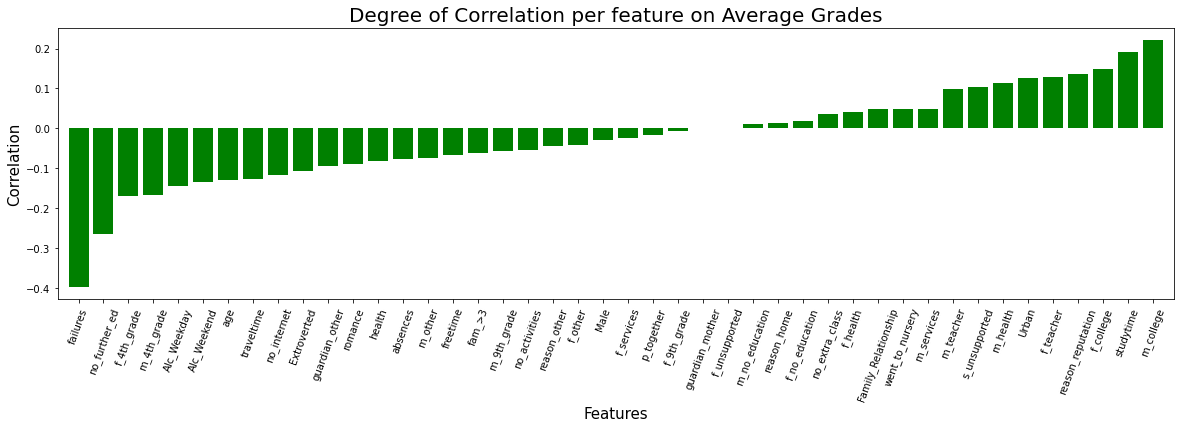

In [14]:
# plot df_corr
plt.figure(figsize = (20, 5))
plt.bar(df_corr.Feature, df_corr.Correlation, color = 'g')
plt.title('Degree of Correlation per feature on Average Grades', fontsize=20, fontweight = 20)
plt.xlabel('Features', fontsize=15)
plt.xticks(rotation = 70)
plt.margins(x=0.01)
plt.ylabel('Correlation', fontsize=15);

In [15]:
# break df_corr into positive and negative
df_corr_neg = df_corr[df_corr.Correlation < 0]
df_corr_pos = df_corr[df_corr.Correlation > 0]

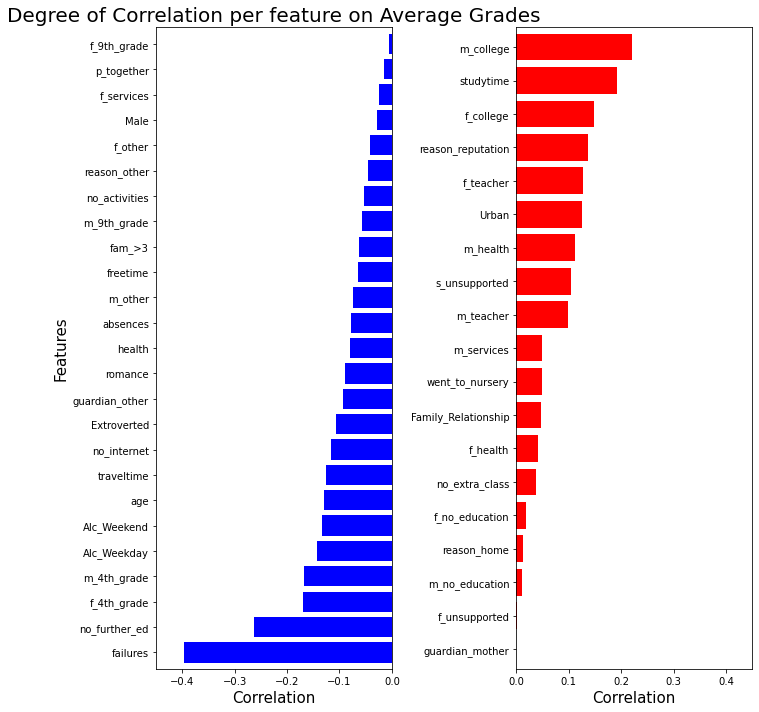

In [16]:
# plot df_corr_neg and df_corr_pos
plt.figure(figsize = (10, 10))

neg = plt.subplot(1, 2, 1)
plt.barh(df_corr_neg.Feature, df_corr_neg.Correlation, color = 'b')
plt.title('Degree of Correlation per feature on Average Grades', fontsize=20, fontweight = 20)
plt.xlabel('Correlation', fontsize=15)
plt.margins(y=0.01)
plt.ylabel('Features', fontsize=15);
plt.xlim([-0.45, 0])

pos = plt.subplot(1, 2, 2)
plt.barh(df_corr_pos.Feature, df_corr_pos.Correlation, color = 'r')
plt.title('', fontsize=20, fontweight = 20)
plt.xlabel('Correlation', fontsize=15)
plt.margins(y=0.01)
# plt.ylabel('Features', fontsize=15);
plt.xlim([0, 0.45])

plt.tight_layout()

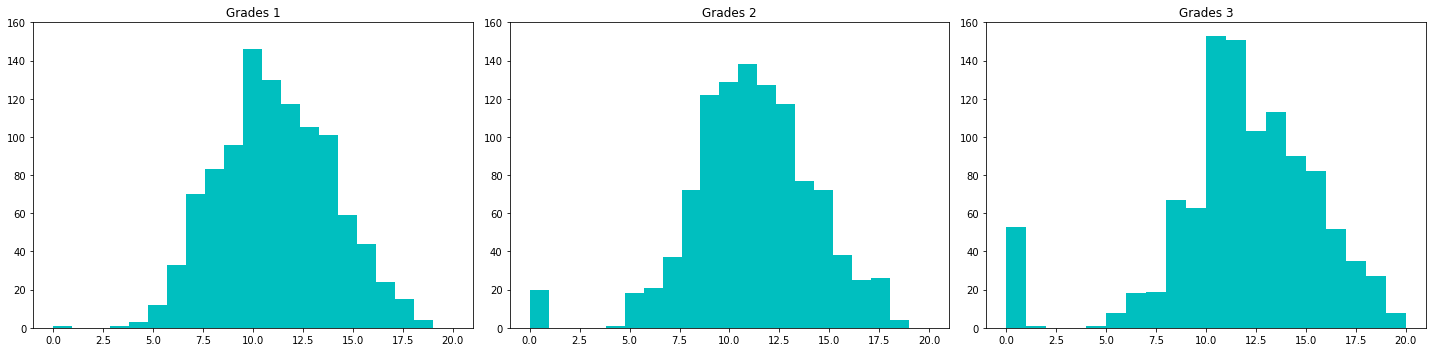

In [17]:
# histogram of Grades 1, 2 and 3 distrobution
plt.figure(figsize = (20, 5))
# fig, axs = plt.subplots(1, 3, figsize = (20, 5))

ax0 = plt.subplot(131)
ax0.hist(df.Grades_1, bins = 20, color = 'c')
ax0.set_xlim([-1, 21])
ax0.set_ylim([0, 160])
ax0.set_title('Grades 1')
ax1 = plt.subplot(132)
ax1.hist(df.Grades_2, bins = 20, color = 'c')
ax1.set_xlim([-1, 21])
ax1.set_ylim([0, 160])
ax1.set_title('Grades 2')
ax2 = plt.subplot(133)
ax2.hist(df.Grades_3, bins = 20, color = 'c')
ax2.set_xlim([-1, 21])
ax2.set_ylim([0, 160])
ax2.set_title('Grades 3')

plt.tight_layout()

(array([  8.,   9.,  11.,  11.,  20.,  23.,  33.,  58., 111.,  94., 134.,
        113., 136.,  65.,  76.,  66.,  26.,  25.,  20.,   5.]),
 array([ 1.33333333,  2.23333333,  3.13333333,  4.03333333,  4.93333333,
         5.83333333,  6.73333333,  7.63333333,  8.53333333,  9.43333333,
        10.33333333, 11.23333333, 12.13333333, 13.03333333, 13.93333333,
        14.83333333, 15.73333333, 16.63333333, 17.53333333, 18.43333333,
        19.33333333]),
 <BarContainer object of 20 artists>)

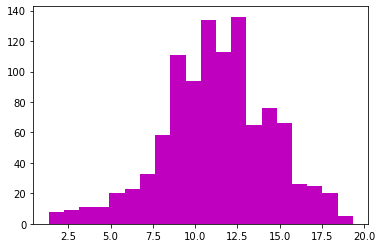

In [18]:
# histogram of average grades distrobution
plt.hist(df.Grades_AVG, bins = 20, color = 'm')

In [19]:
# new dataframe for all features over 0.1 correation
df_corr_thresh = df_corr[abs(df_corr.Correlation) > 0.1].reset_index()
df_corr_thresh.drop(axis = 1, columns = ['index'], inplace = True)

pd.set_option('max_columns', None)
df_corr_thresh

,Feature,Correlation
0,failures,-0.397262
1,no_further_ed,-0.263819
2,f_4th_grade,-0.170528
3,m_4th_grade,-0.166799
4,Alc_Weekday,-0.143283
5,Alc_Weekend,-0.133902
6,age,-0.129135
7,traveltime,-0.126157
8,no_internet,-0.116900
9,Extroverted,-0.107309


In [20]:
# mega dataframe of all 3 dataframes with dummy variables
# what does that give me?
# what can I do with this?

df_mega = pd.concat([numerical_df, categorical_df_per, categorical_df_fam]).reset_index()
df_mega.drop(axis = 1, columns = ['index'], inplace = True)

pd.set_option('max_columns', None)
# df_mega

In [21]:
numerical_df[['age', 'failures']].corr()

,age,failures
age,1.000000,0.282364
failures,0.282364,1.000000


In [22]:
df_risk = pd.read_csv(r'C:\Users\mitch\OneDrive\Documents\Metis Business\Student_Data - Sheet3.csv')
df_risk.columns = df_risk.columns.str.strip()
df_risk.drop(['Unnamed: 14'], axis = 1, inplace = True)

pd.set_option('max_columns', None)
df_risk.sort_values(by = 'Total Risk Assessment', ascending = False)

,age,Environment,M_Education,F_Education,traveltime,studytime,failures,School_Support,Higher_Ed,internet,Extroverted,Alc_Weekday,Alc_Weekend,Grades_AVG,Low,Medium Low,Medium,High,Very High,Total Risk Assessment
0,17,Rural,m_4th_grade,f_4th_grade,4,2,3,s_unsupported,no_further_ed,no_internet,5,1,5,6.666667,3,0,2,2,6,34
2,17,Rural,m_4th_grade,f_4th_grade,4,2,0,s_unsupported,no_further_ed,no_internet,5,1,5,8.000000,4,0,2,1,6,31
3,19,Rural,m_4th_grade,f_4th_grade,2,2,3,s_unsupported,no_further_ed,no_internet,4,1,4,2.666667,2,1,3,4,3,31
1,17,Rural,m_9th_grade,f_4th_grade,3,1,0,s_unsupported,no_further_ed,no_internet,5,5,5,9.000000,4,0,2,1,6,31
20,18,Rural,m_4th_grade,f_4th_grade,3,1,3,s_unsupported,continued_ed,no_internet,5,1,5,9.000000,4,0,2,2,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,18,Urban,m_college,f_12th_grade,1,4,0,s_unsupported,continued_ed,internet,3,1,1,16.666667,12,0,1,0,0,2
998,16,Urban,m_college,f_12th_grade,1,4,0,s_unsupported,continued_ed,internet,2,1,1,17.000000,12,1,0,0,0,1
1041,16,Urban,m_college,f_12th_grade,1,4,0,s_unsupported,continued_ed,internet,2,1,1,19.333333,12,1,0,0,0,1
1042,17,Urban,m_9th_grade,f_9th_grade,1,4,0,s_unsupported,continued_ed,internet,1,1,1,6.333333,13,0,0,0,0,0


In [23]:
# plt.scatter(df_risk['Total Risk Assessment'], df_risk['Grades_AVG'])
# plt.xlabel('Total Risk Assessment')
# plt.ylabel('Grades_AVG')

# Box
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.boxplot(x = df_risk['Alc_Weekend'], y = df_risk['Total Risk Assessment'], palette = 'Reds')

# Box
# palette_M_edu = {M_Education: 'r' if M_Education == 'm_4th_grade' else 'gray' for M_Education in df['M_Education'].unique()}
# S = sns.boxplot(x = df_risk['M_Education'], y = df_risk['Total Risk Assessment'], palette = palette_M_edu)
# sns.set(rc = {'figure.figsize':(4,3)})
# sns.set(font_scale=1.5)
# sns.set_style('white')
# S.set_xlabel("")
# S.set_ylabel("Total Risk Assessment")
# S.set_title("Mother's Highest Education")

# Box
# S = sns.boxplot(x = df_risk['Environment'], y = df_risk['Total Risk Assessment'], palette = 'Greens')
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.set(font_scale=2)
# sns.set_style('white')
# S.set_xlabel("")
# S.set_ylabel("Total Risk Assessment")
# S.set_title("Environment")

# Box
# palette_age = {age: 'r' if age > 18 else 'gray' for age in df['age'].unique()}
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.boxplot(x = df_risk['age'], y = df_risk['Total Risk Assessment'], palette = palette_age)

# Box
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.boxplot(x = df_risk['traveltime'], y = df_risk['Total Risk Assessment'], palette = 'Reds')

# Box
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.boxplot(x = df_risk['studytime'], y = df_risk['Total Risk Assessment'], palette = 'Greens')


# sns.set(rc = {'figure.figsize':(15,8)})
# sns.boxplot(x = df_risk['Higher_Ed'], y = df_risk['Total Risk Assessment'], palette = 'Greens')

Text(0.5, 1.0, 'Weekend Alcohol Consumption')

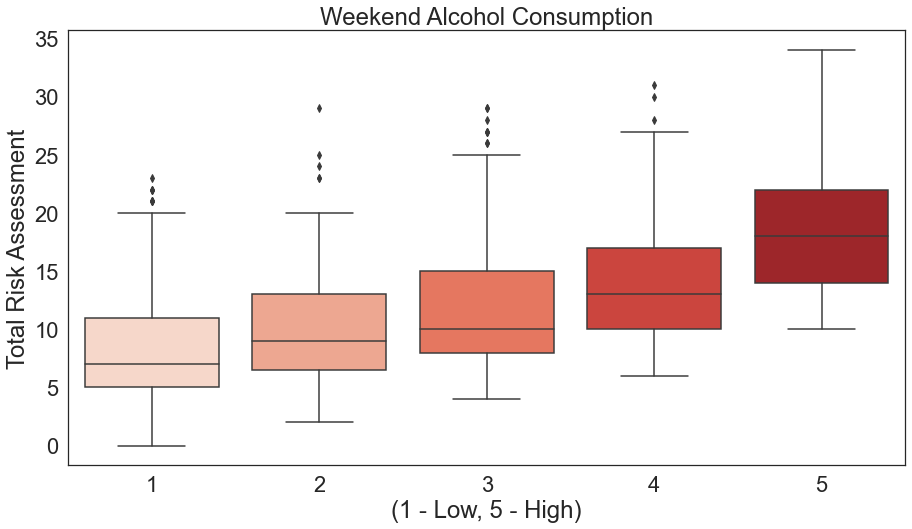

In [34]:
# Box
S = sns.boxplot(x = df_risk['Alc_Weekend'], y = df_risk['Total Risk Assessment'], palette = 'Reds')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("(1 - Low, 5 - High)")
S.set_ylabel("Total Risk Assessment")
S.set_title("Weekend Alcohol Consumption")

Text(0.5, 1.0, "Mother's Highest Education")

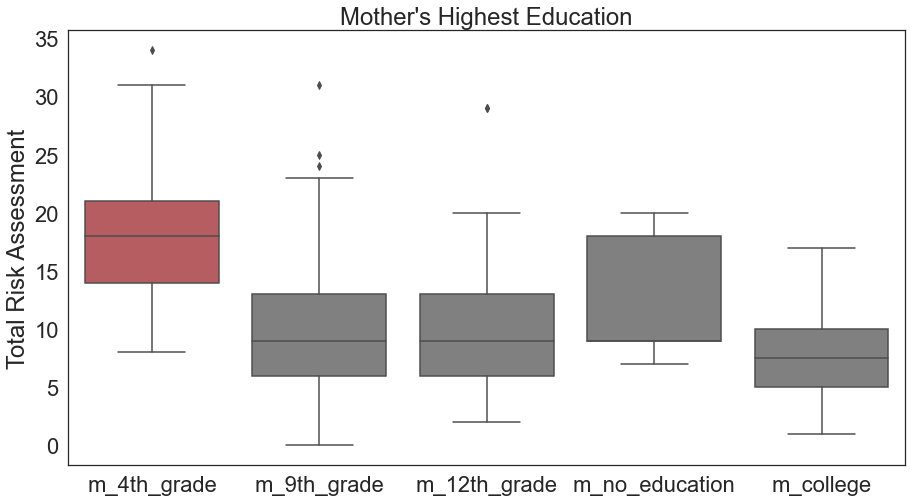

In [25]:
# Box
palette_M_edu = {M_Education: 'r' if M_Education == 'm_4th_grade' else 'gray' for M_Education in df['M_Education'].unique()}
S = sns.boxplot(x = df_risk['M_Education'], y = df_risk['Total Risk Assessment'], palette = palette_M_edu)
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("")
S.set_ylabel("Total Risk Assessment")
S.set_title("Mother's Highest Education")

Text(0.5, 1.0, 'Environment')

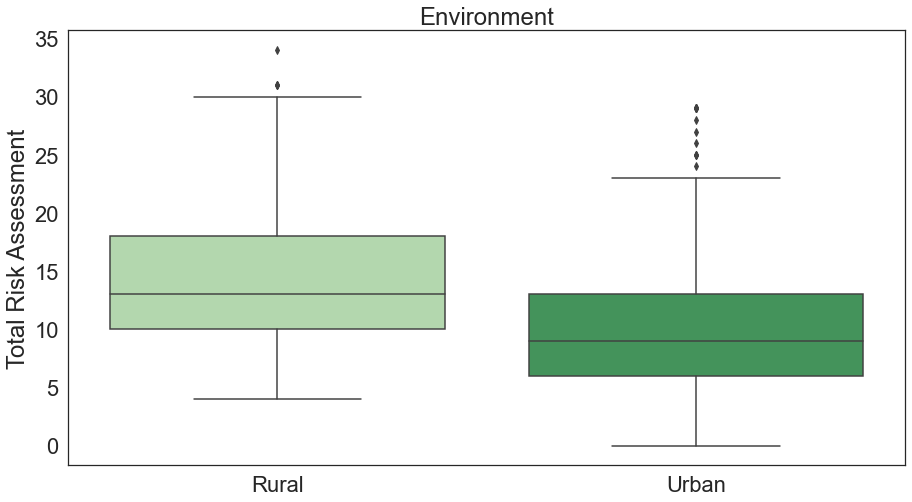

In [26]:
# Box
S = sns.boxplot(x = df_risk['Environment'], y = df_risk['Total Risk Assessment'], palette = 'Greens')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("")
S.set_ylabel("Total Risk Assessment")
S.set_title("Environment")

Text(0.5, 1.0, "Student's Age")

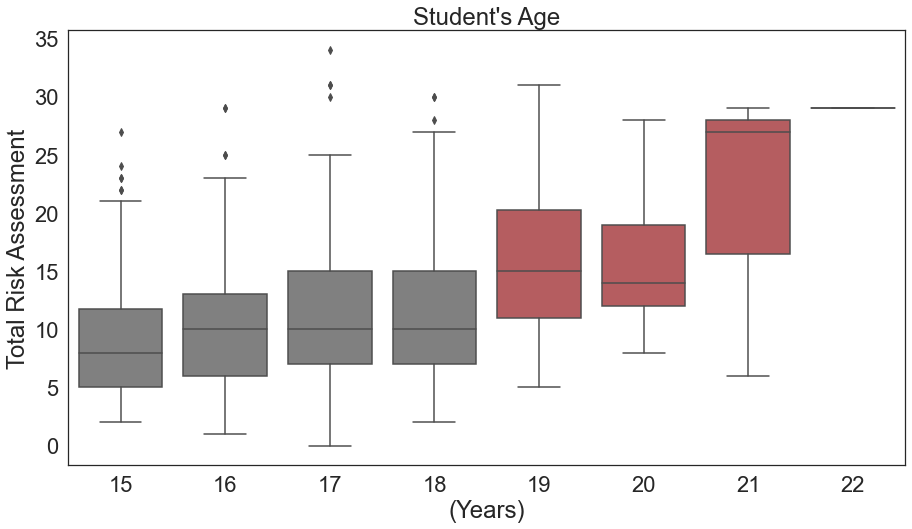

In [27]:
# Box
palette_age = {age: 'r' if age > 18 else 'gray' for age in df['age'].unique()}
S = sns.boxplot(x = df_risk['age'], y = df_risk['Total Risk Assessment'], palette = palette_age)
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("(Years)")
S.set_ylabel("Total Risk Assessment")
S.set_title("Student's Age")

Text(0.5, 1.0, 'Travel Time')

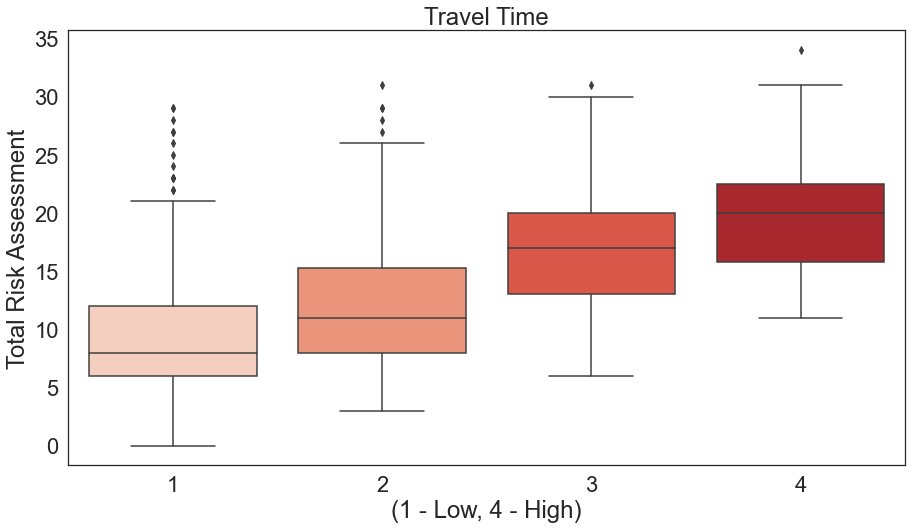

In [28]:
# Box
S = sns.boxplot(x = df_risk['traveltime'], y = df_risk['Total Risk Assessment'], palette = 'Reds')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("(1 - Low, 4 - High)")
S.set_ylabel("Total Risk Assessment")
S.set_title("Travel Time")

Text(0.5, 1.0, 'Study Time')

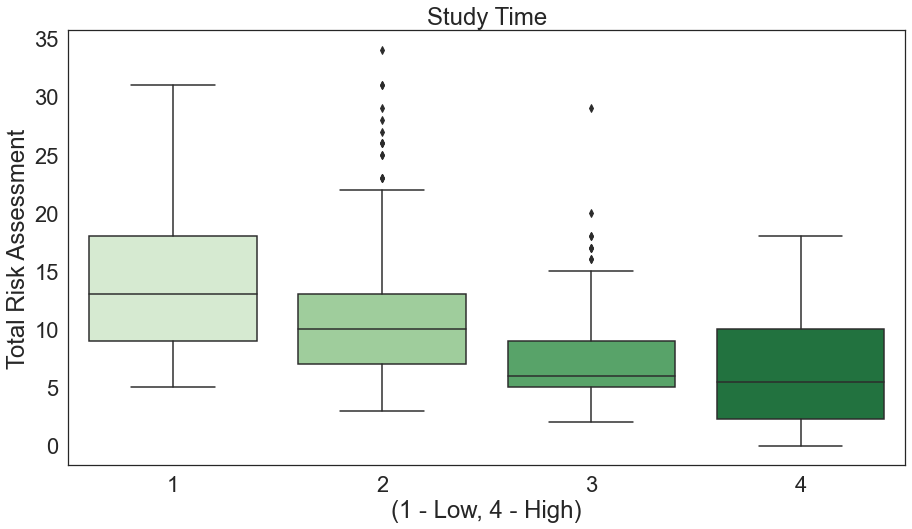

In [29]:
# Box
S = sns.boxplot(x = df_risk['studytime'], y = df_risk['Total Risk Assessment'], palette = 'Greens')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("(1 - Low, 4 - High)")
S.set_ylabel("Total Risk Assessment")
S.set_title("Study Time")

Text(0.5, 1.0, 'Pursued Higher Education')

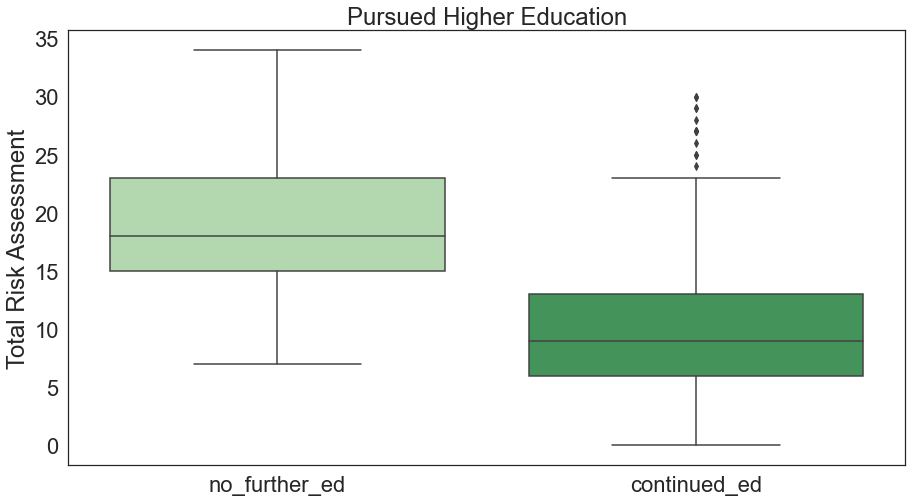

In [30]:
# Box
S = sns.boxplot(x = df_risk['Higher_Ed'], y = df_risk['Total Risk Assessment'], palette = 'Greens')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)
sns.set_style('white')
S.set_xlabel("")
S.set_ylabel("Total Risk Assessment")
S.set_title("Pursued Higher Education")

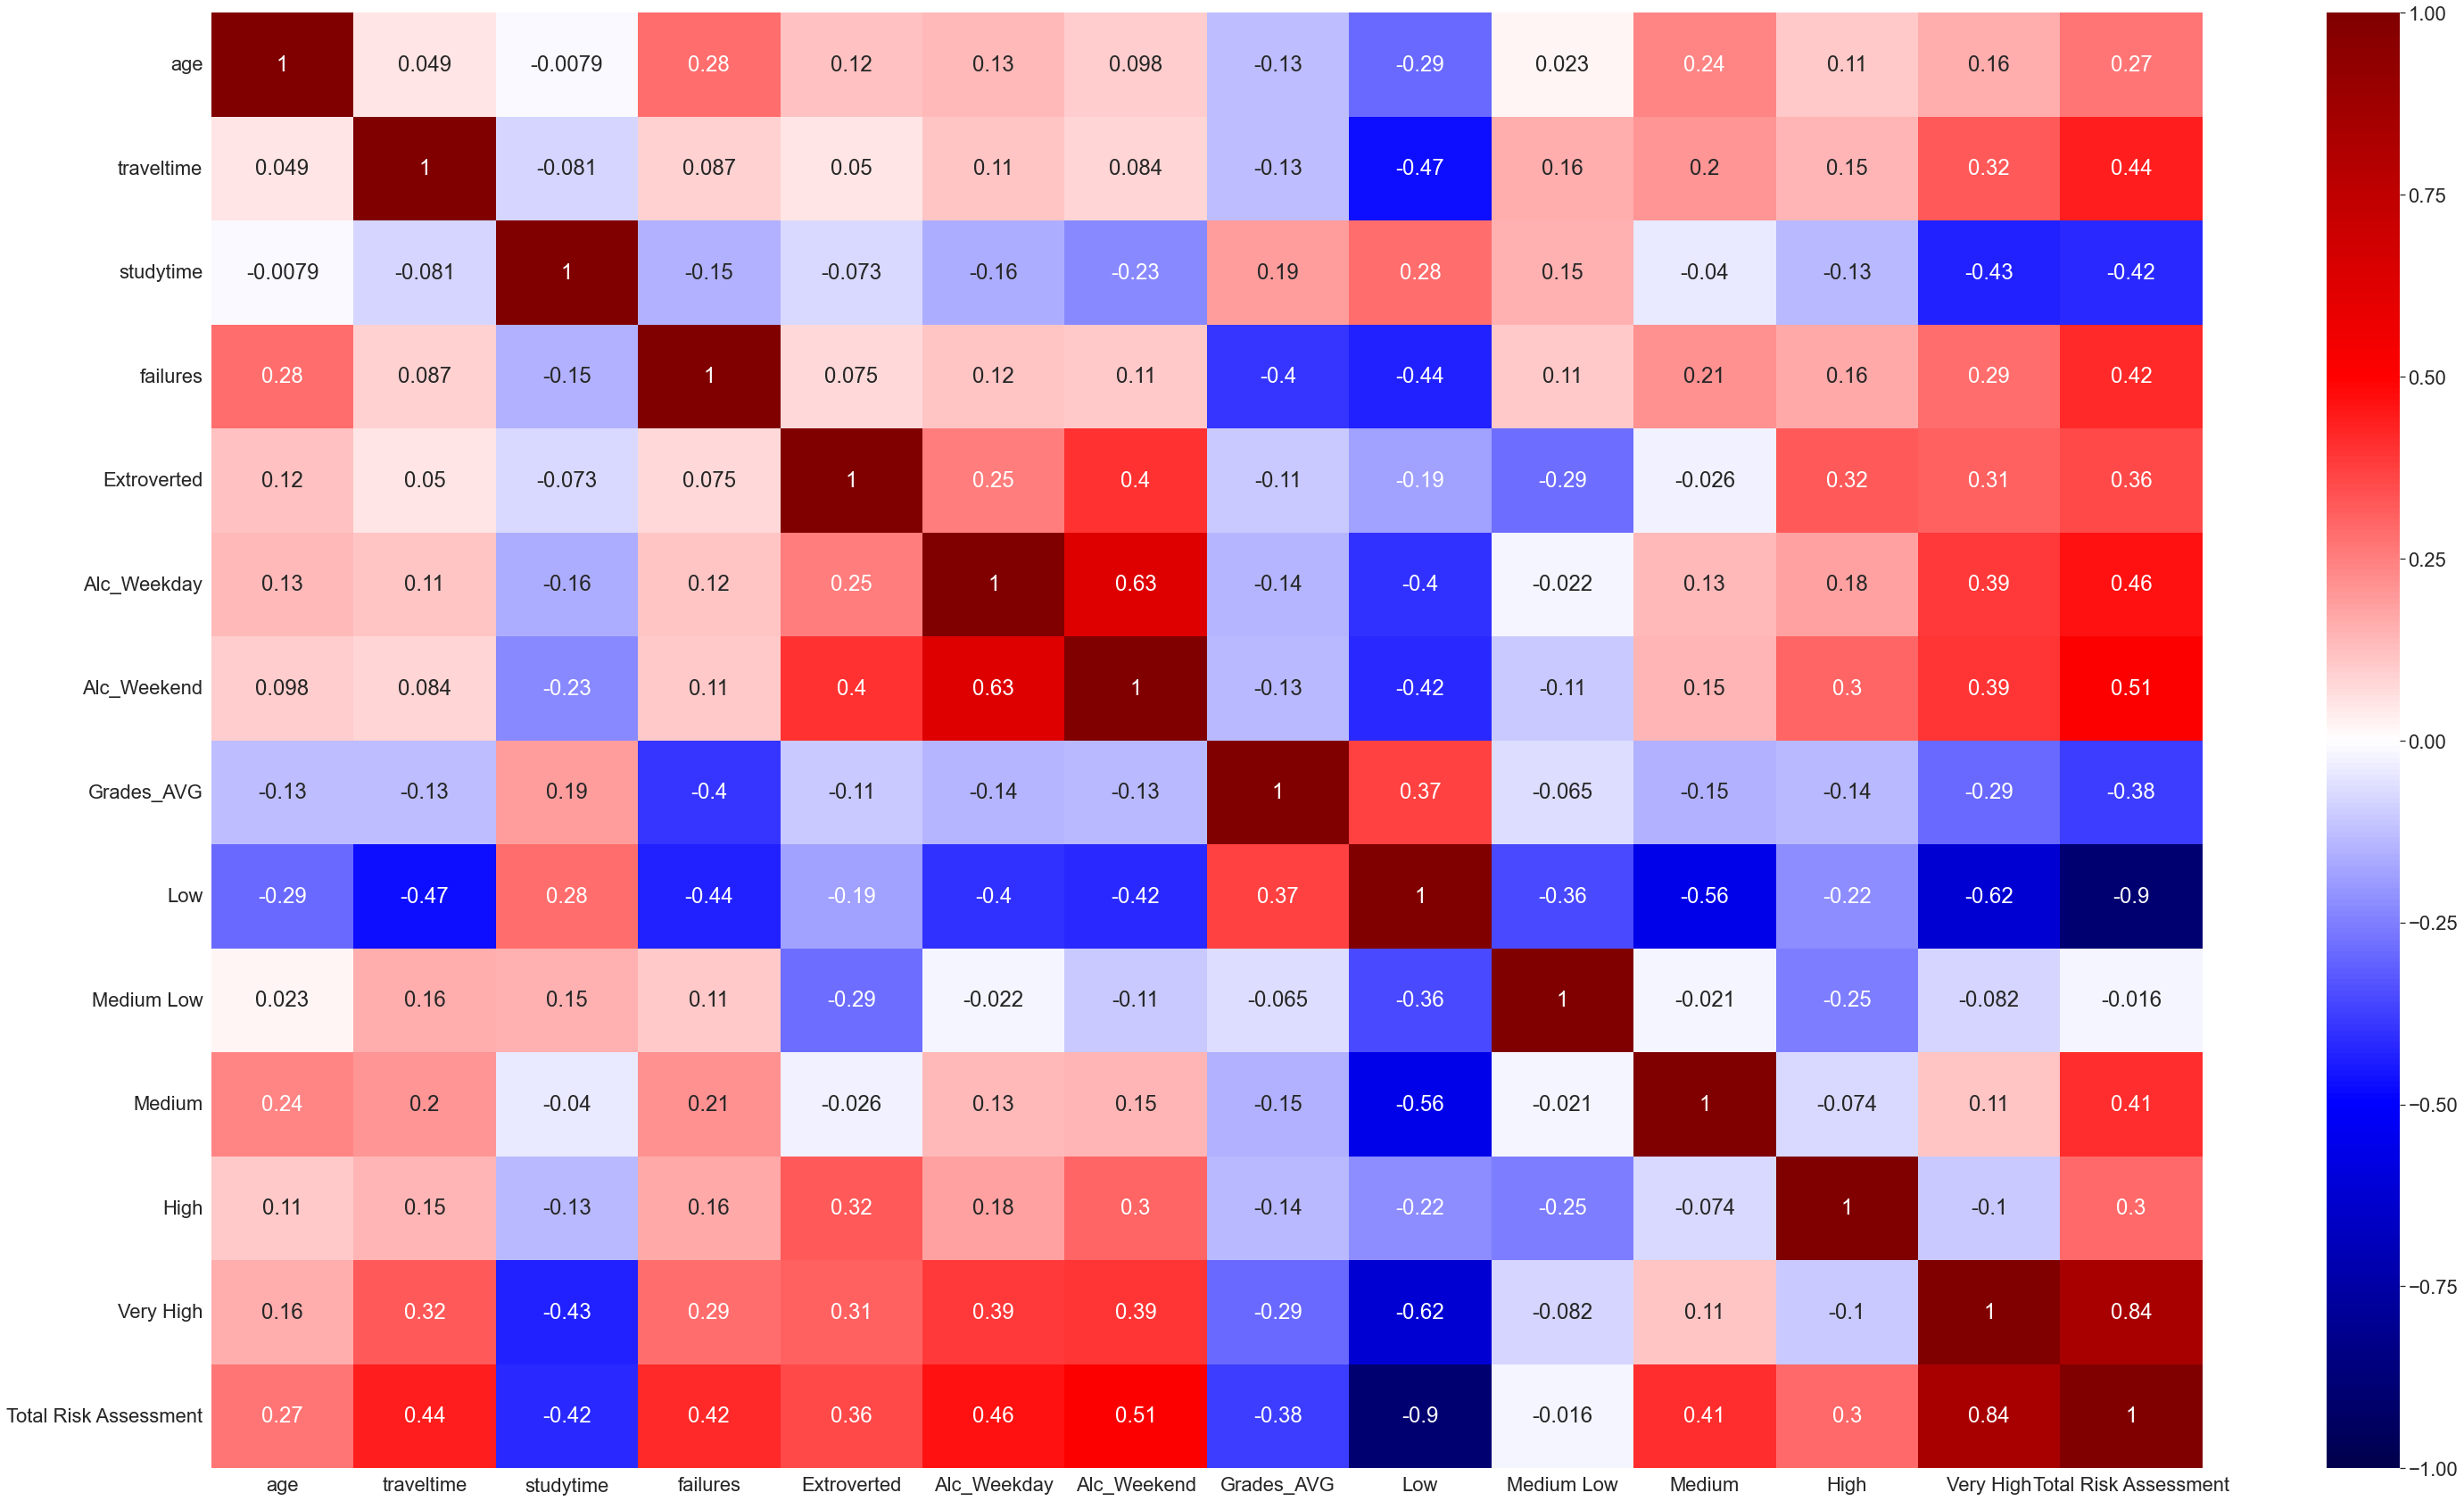

In [31]:
# df_risk.corr()

rcParams['figure.figsize'] = 50,30
heatmap = sns.heatmap(df_risk.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig('heatmap')

In [32]:
# TODO

# reduce three grade columns to 1 (average)
# finish dummy cleaning and make new df_dummies (cols not in the numeric heatmap)
# redo the heatmap (numerics+dummies)
# grade distrobution plot (histogram)
# groupby reds vs blues
# barchar of positively correlated values (y-axis is correlation score) (MVP-EDA)
# barchar of negatively correlated values (y-axis is correlation score) (MVP-EDA)
# get percents of how many students fit into each feature (MVP-EDA)
# new df on highest correlating features (threshold |0.1|)

# regression model (optimus prime)
# graphs in tableau